In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [7]:
#Codificando features Sex,BP e cholesterol
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [8]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [9]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_num'] = df['Drug'].map(custom_map)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [10]:
df.drop('Drug',axis=1).corr()['Drug_num']

,Drug_num
Age,-0.004828
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.589120
Drug_num,1.000000


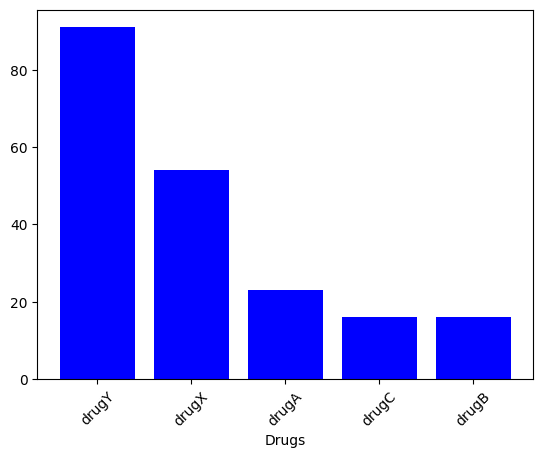

In [11]:
category_counts = df['Drug'].value_counts()

#Grafico de categorias distribuidas
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drugs')
plt.xticks(rotation=45)
plt.show()

In [12]:
#Variaveis
y = df['Drug']

X = df.drop(['Drug', 'Drug_num'],axis=1)



In [17]:
#Splitando dataset(Aqui seria util usar stratify para aumentar o balanceamento do dataset, o laboratorio não pediu.)
X_trainset, X_testset,y_trainset,y_testset = train_test_split(X,y, test_size=0.3,stratify=y,random_state=32)

In [28]:
drugTree = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=4,
                                  min_samples_leaf=5,
                                  random_state=42)

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)

Acuracia da árvore: 100.0%
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



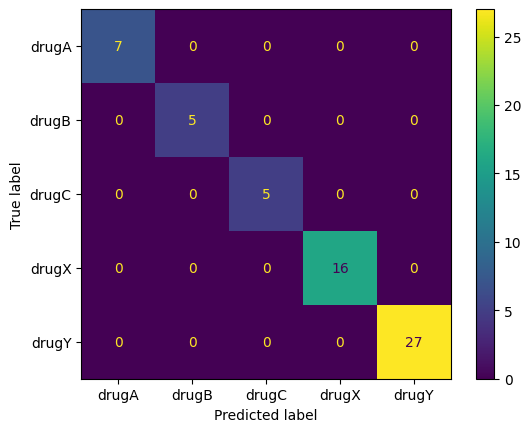

In [23]:
#Previsão
tree_prediction = drugTree.predict(X_testset)
print(f'Acuracia da árvore: {np.round(100*metrics.accuracy_score(y_testset,tree_prediction),2)}%')

print(metrics.classification_report(y_testset, tree_prediction))
metrics.ConfusionMatrixDisplay.from_predictions(y_testset, tree_prediction)
plt.show()


In [27]:
pd.Series(drugTree.feature_importances_,index=X.columns).sort_values(ascending=False)


,0
Na_to_K,0.507181
BP,0.306827
Age,0.095889
Cholesterol,0.090103
Sex,0.000000


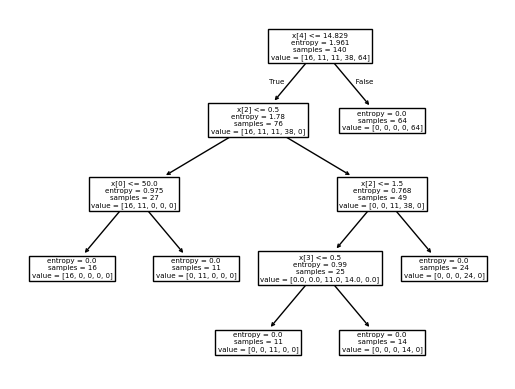

In [20]:
#Árvore de decisão
plot_tree(drugTree)
plt.show()

**Decision criteria:**

Drug A : $Na\_to\_K <= 14.627,\ BP = High,\ Age <= 50.5$<br>
Drug B : $Na\_to\_K <= 14.627,\ BP = High,\ Age > 50.5$<br>
Drug C : $Na\_to\_K <= 14.627,\ BP = Low,\ Cholesterol <= High$<br>
Drug X : $Na\_to\_K <= 14.627,\ BP = Normal,\ Cholesterol = High$


In [25]:
print(sklearn.__version__)


1.6.1
